In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [207]:
baseballplayer = pd.read_csv('C:/Users/jycha/Downloads/baseball_players.csv')

In [208]:
baseballplayer.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [209]:
baseballplayer.keys()

Index(['Name', 'Team', 'Position', 'Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')

In [210]:
df = pd.DataFrame(data=baseballplayer, columns=baseballplayer.columns)

In [211]:
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [212]:
df.columns

Index(['Name', 'Team', 'Position', 'Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')

In [213]:
df.isna().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [214]:
df['Weight(pounds)'] = df['Weight(pounds)'].fillna(df['Weight(pounds)'].mean())

In [215]:
df.isna().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    0
Age               0
dtype: int64

In [216]:
df.shape

(1034, 6)

Text(0, 0.5, 'Count')

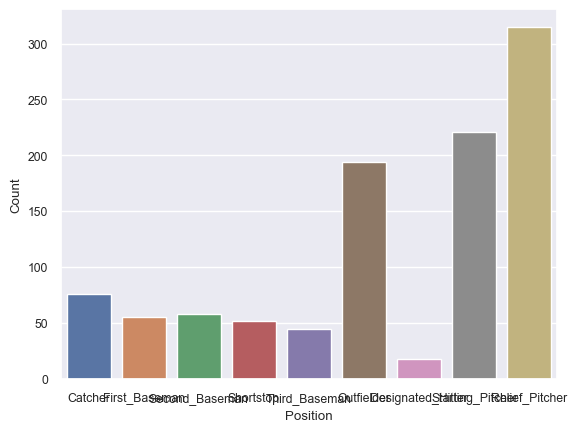

In [217]:
sns.countplot(data=df, x='Position')
plt.xlabel('Position')
plt.ylabel('Count')

<AxesSubplot:xlabel='Position', ylabel='Height(inches)'>

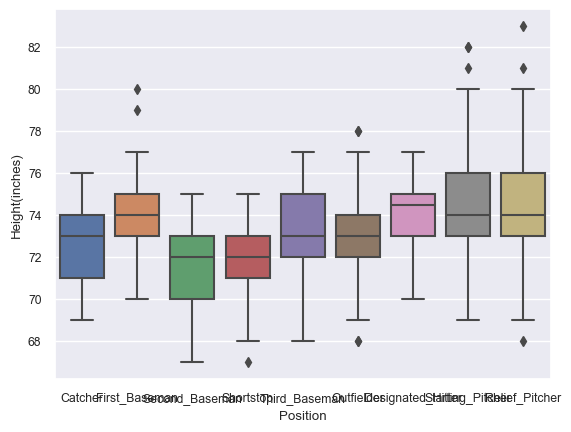

In [218]:
sns.boxplot(x='Position', y='Height(inches)', data=df)

<AxesSubplot:xlabel='Position', ylabel='Weight(pounds)'>

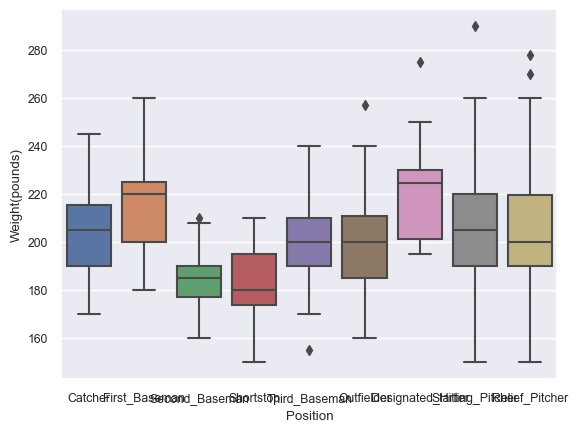

In [219]:
sns.boxplot(x='Position', y='Weight(pounds)', data=df)

In [220]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Position']=le.fit_transform(df['Position'])
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,2,72,210.0,35.43
4,Chris_Gomez,BAL,2,73,188.0,35.71


Text(0.5, 1.0, 'Records per position')

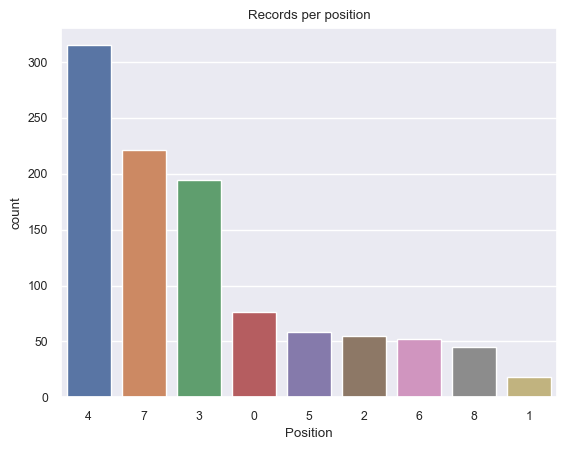

In [221]:
sns.countplot(x='Position', data=df, order=df.Position.value_counts().index)
plt.title("Records per position")

In [222]:
df_outcome = pd.crosstab(index=df["Position"],  # Make a crosstab
                              columns="count")      # Name the count column

df_outcome

col_0,count
Position,
0,76
1,18
2,55
3,194
4,315
5,58
6,52
7,221
8,45


In [223]:
x_data=df[['Height(inches)', 'Weight(pounds)', 'Age']]
x_data.head()

,Height(inches),Weight(pounds),Age
0,74,180.0,22.99
1,74,215.0,34.69
2,72,210.0,30.78
3,72,210.0,35.43
4,73,188.0,35.71


In [224]:
y_data=df['Position']
y_data.head()

0    0
1    0
2    0
3    2
4    2
Name: Position, dtype: int32

In [225]:
# train & test set split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(775, 3) (775,)
(259, 3) (259,)


In [226]:
# Classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


--- SVM Classifier ---
0.29343629343629346
[[ 0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0 56  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0]]


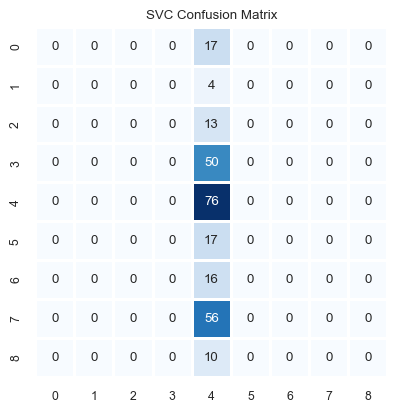

In [227]:
# SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("SVC Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_svm), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Decision Tree Classifier ---
0.23938223938223938
[[ 2  0  1  3  6  1  1  2  1]
 [ 0  1  0  0  3  0  0  0  0]
 [ 2  1  2  1  5  1  0  1  0]
 [ 3  1  3  8 15  3  7  7  3]
 [ 5  1  1  9 30  4  4 18  4]
 [ 0  1  1  5  2  2  1  3  2]
 [ 1  0  1  2  5  3  1  3  0]
 [ 2  0  2  7 20  3  2 16  4]
 [ 1  0  0  2  2  1  1  3  0]]


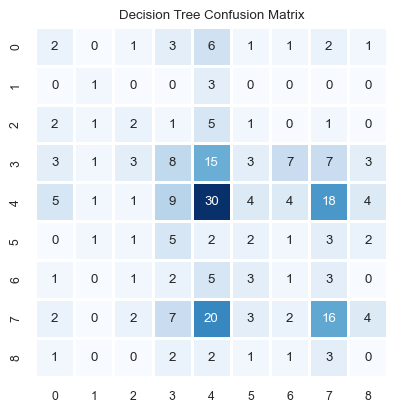

In [228]:
# DT

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)
pred_dt = clf_dt.predict(X_test)

print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_dt), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Random Forest ---
0.27413127413127414
[[ 2  0  1  4  4  1  1  2  2]
 [ 0  0  0  0  4  0  0  0  0]
 [ 1  1  0  1  5  1  0  4  0]
 [ 1  1  2 11 18  3  5  7  2]
 [ 1  0  1  9 38  4  4 18  1]
 [ 0  1  0  6  2  3  2  3  0]
 [ 1  0  0  3  6  3  1  2  0]
 [ 1  0  2  7 22  2  3 16  3]
 [ 1  0  0  1  2  2  0  4  0]]


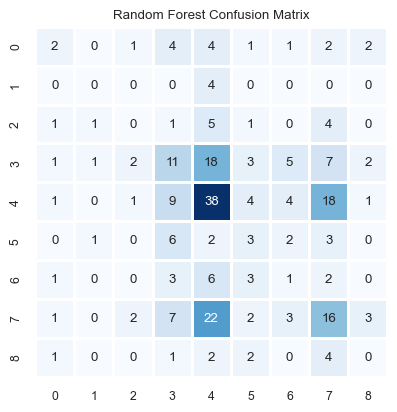

In [229]:
# RF

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print("\n--- Random Forest ---")
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test, pred_rf))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_rf), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()


--- Logistic Regression Classifier ---
0.2972972972972973
[[ 0  0  0  0 17  0  0  0  0]
 [ 0  0  1  0  3  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0]
 [ 0  0  0  1 49  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0]
 [ 0  0  0  1 16  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0 10  0  0  0  0]]


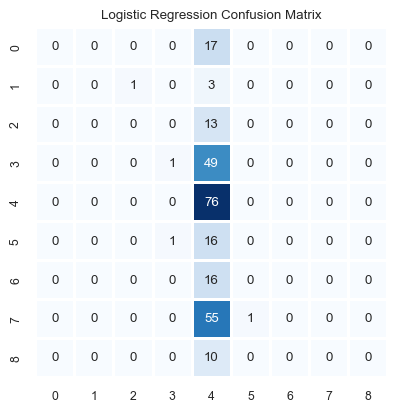

In [230]:
# LR

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test)

print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))

# confusion matrix

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, pred_lr), cbar=False, linewidths=1.0, annot=True, fmt="d", cmap="Blues")
plt.show()

In [231]:
# DataFrame Copy

df2 = df.copy()
df2.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,0,74,180.0,22.99
1,Paul_Bako,BAL,0,74,215.0,34.69
2,Ramon_Hernandez,BAL,0,72,210.0,30.78
3,Kevin_Millar,BAL,2,72,210.0,35.43
4,Chris_Gomez,BAL,2,73,188.0,35.71


In [259]:
x=df2.loc[:, ['Position']]
x.head()

,Position
0,0
1,0
2,0
3,2
4,2


In [260]:
y=df2.loc[:, ['Height(inches)']]
y.head()

,Height(inches)
0,74
1,74
2,72
3,72
4,73


In [261]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(775, 1) (775, 1)
(259, 1) (259, 1)


In [262]:
# Regression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

평균제곱근오차 2.357105898997196


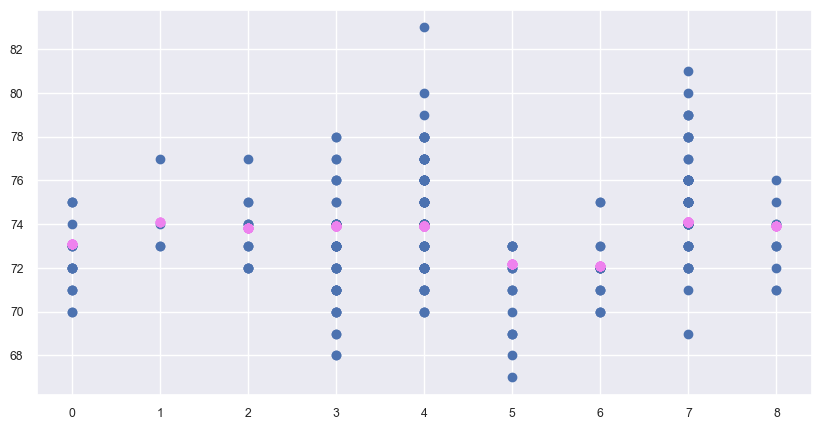

In [263]:
# SVR

model = SVR()
model.fit(X_train, y_train)

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Position'], y_test, label='y_test')
plt.scatter(X_test['Position'], sy_preds, c='violet', label='sy_preds')
plt.show()

평균제곱근오차 2.2275574144525305


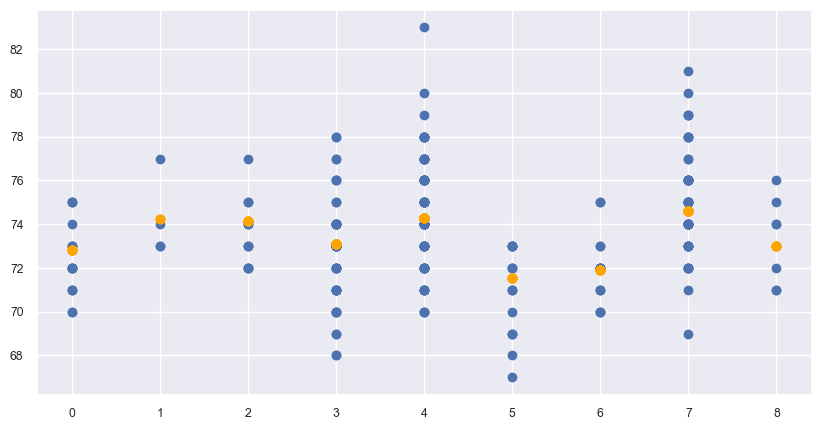

In [264]:
# DT

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Position'], y_test, label='y_test')
plt.scatter(X_test['Position'], dy_preds, c='orange', label='dy_preds')
plt.show() 

평균제곱근오차 2.2271883574910554


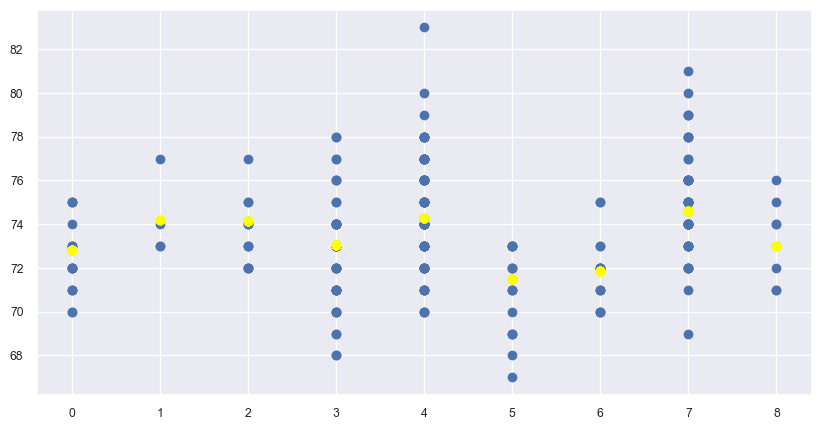

In [265]:
# RF

model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Position'], y_test, label='y_test')
plt.scatter(X_test['Position'], ry_preds, c='yellow', label='ry_preds')
plt.show() 

평균제곱근오차 2.5081235130635866


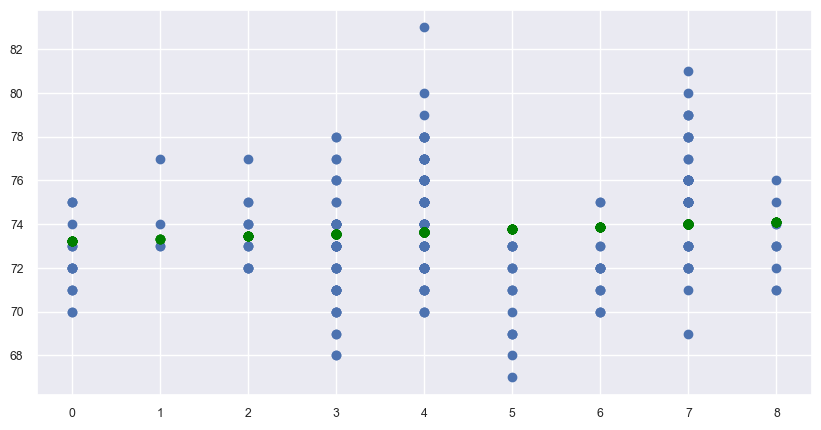

In [266]:
# LR

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Position'], y_test, label='y_test')
plt.scatter(X_test['Position'], ly_preds, c='green', label='ly_preds')
plt.show()